In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## STEP 1 : Data Collection

In [2]:
filepath_House_Price = r"C:\Users\aakas\PythonStuff\Projects\Cali_HP\dataset\housing.csv"

In [3]:
houses = pd.read_csv(filepath_House_Price , header = 0 )

In [4]:
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### (i) To see number of null values , datatypes and memory usage

In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### (ii) Fetching numerical and categorical columns

In [6]:
def num_cat_col_list(DF) : 
    
    from pandas.api.types import is_string_dtype, is_numeric_dtype

    
    num_list = []
    cat_list = []

    for column in DF:

        if is_numeric_dtype(DF[column]):
            num_list.append(column)

        elif is_string_dtype(DF[column]):
            cat_list.append(column)

    return (num_list , cat_list)

In [7]:
num_list , cat_list = num_cat_col_list(houses)

print("Numerical column : ",num_list)
print()
print("Categorical column : ",cat_list)

Numerical column :  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

Categorical column :  ['ocean_proximity']


### (iii) Histogram-kde  for Numerical  attributes.

In [8]:
def hist_kde_plot(DF , num_list):
    
    total_size1 = len(num_list) 

    n_cols1 = 2
    n_rows1 = int(np.ceil(total_size1/n_cols1))

    fig1,axes1 = plt.subplots(nrows = n_rows1 ,ncols = n_cols1 , figsize = (12,18))

    i = 0
    j = 0

    fig1.suptitle("HISTOGRAM \n", fontweight="bold" ,fontsize=20)


    for col in num_list:


        axes2 = sns.histplot(ax = axes1[i,j], data = DF , x = col ,kde =  True ,bins = 20)
        fig1.tight_layout()

        axes2.set_title(f"{col}",fontweight="bold" ,fontsize=12)

        if j == n_cols1 -1:

            i +=1
            j = 0

        else :
            j+=1  


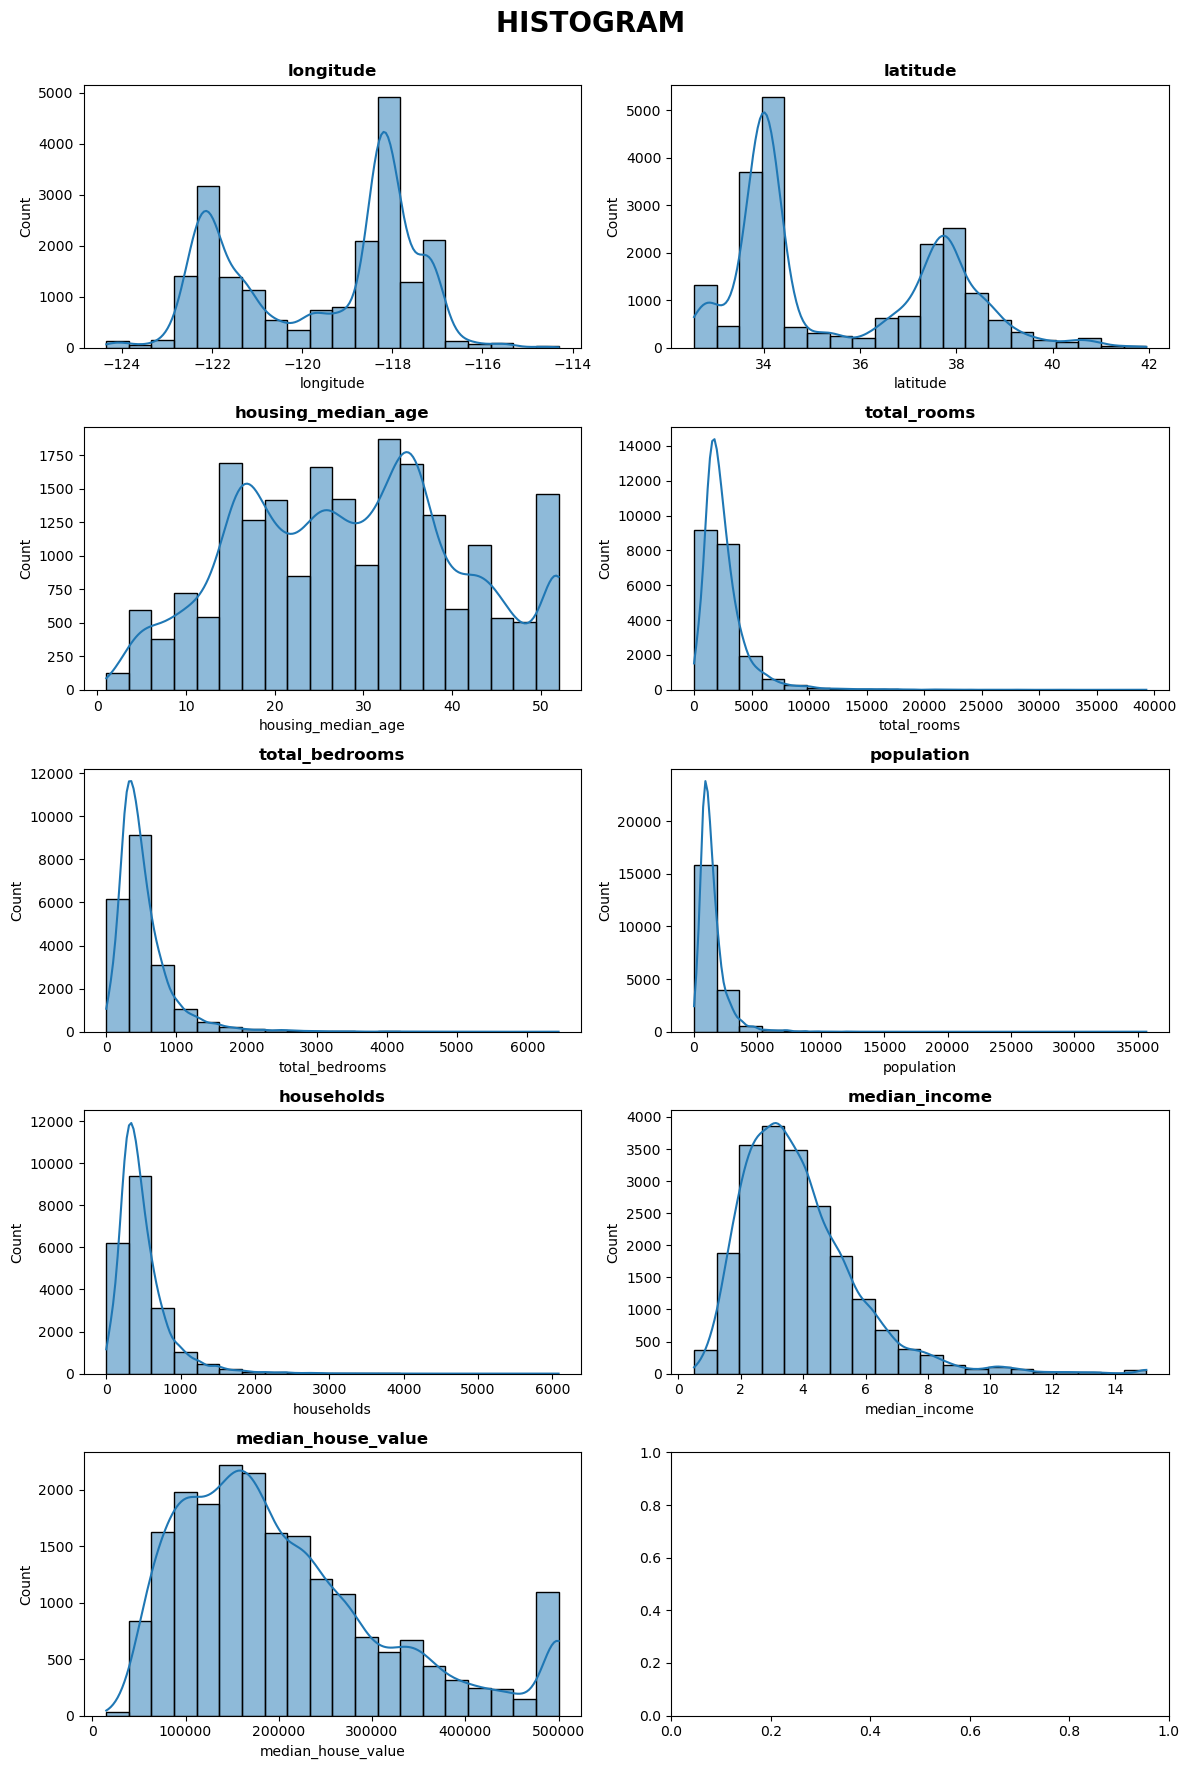

In [9]:
hist_kde_plot(DF = houses, num_list=num_list)

### INSIGHTS

**Right Skewed Distributed Features** : <br> 
total_rooms , total_bedrooms , population , households , median_income , median_house_value

In [10]:
from sklearn.preprocessing import power_transform

In [11]:
# pld : power law distribution attributes (potential candidates by looking at the hist-kde plot)
pld = ['total_rooms' , 'total_bedrooms' , 'population' , 'households']

In [75]:
def box_cox_transform(DF, columns):
    
    passed = []
    failed = []

    for col in columns:

        arr = DF[col].dropna().to_numpy().reshape(-1,1)
        #print(arr)
        tr_arr = power_transform(arr, method='box-cox')
        #print(tr_arr)
        test_arr = tr_arr.reshape(1,-1)[0]
        
        print("****************************************************************\n")
        print(f"Checking for feature :  {col}")


        results = stats.kstest(test_arr, "norm")
        
        D_value = results[0]
        P_value = results[1]

        print("D-statistic : ",D_value)
        print("P-value : ",P_value)
        
        if D_value <= P_value :

            passed.append(col)
            print("Passed feature : ",col)

        else:

            failed.append(col)
            print("Failed feature : ",col)
        
        # For hist-kde plot of transformed feature
        
        plt.figure(figsize = (3,2.5) , dpi = 125)
        
        sns.histplot(data = tr_arr.reshape(1,-1)[0] ,kde =  True ,bins = 20)
        plt.tight_layout()
        
        
        ax.set_title(f"{col}",fontweight="bold" ,fontsize=12)
        plt.show()
        
        # For Q-Q plot plot of transformed feature
        plt.figure(figsize = (3,3) , dpi = 125)
        stats.probplot(x = test_arr , dist='norm', plot= plt)
                      
        plt.title(f"Q-Q plot of {col} with Normal Distribution." )
        
        plt.show()
        
        print("****************************************************************\n")

    return passed,failed

****************************************************************

Checking for feature :  total_rooms
D-statistic :  0.048600654916354014
P-value :  8.309104688898873e-43
Failed feature :  total_rooms


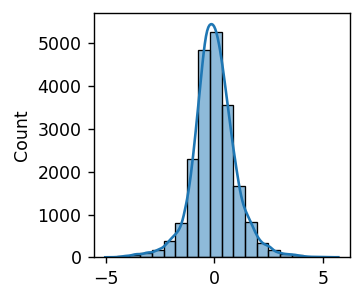

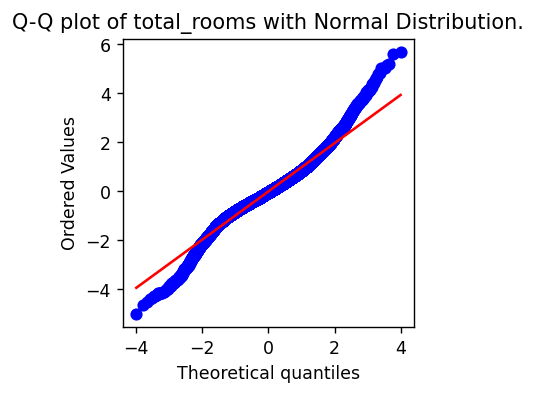

****************************************************************

****************************************************************

Checking for feature :  total_bedrooms
D-statistic :  0.04816707354048938
P-value :  1.2302699597355506e-41
Failed feature :  total_bedrooms


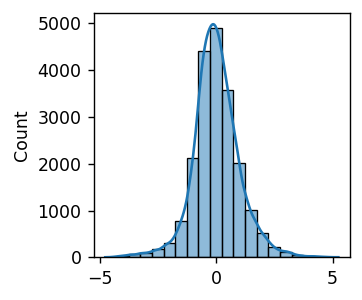

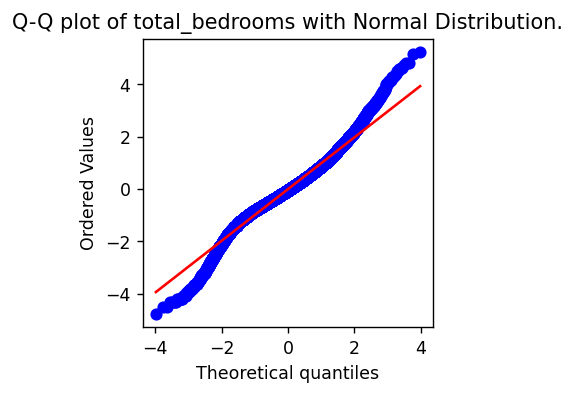

****************************************************************

****************************************************************

Checking for feature :  population
D-statistic :  0.04479858736082179
P-value :  1.9637290476563343e-36
Failed feature :  population


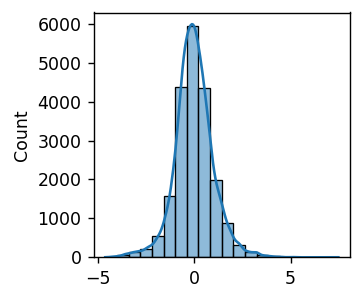

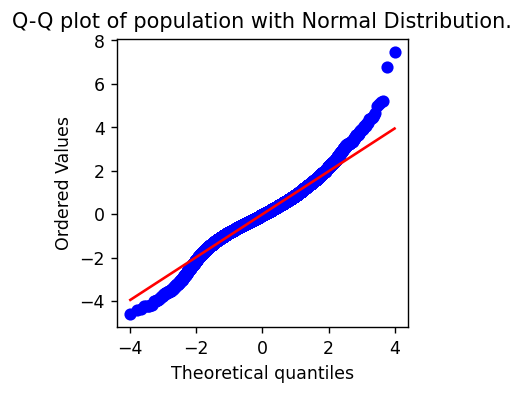

****************************************************************

****************************************************************

Checking for feature :  households
D-statistic :  0.04848046865328676
P-value :  1.3458081844451756e-42
Failed feature :  households


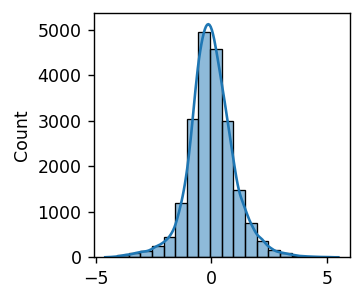

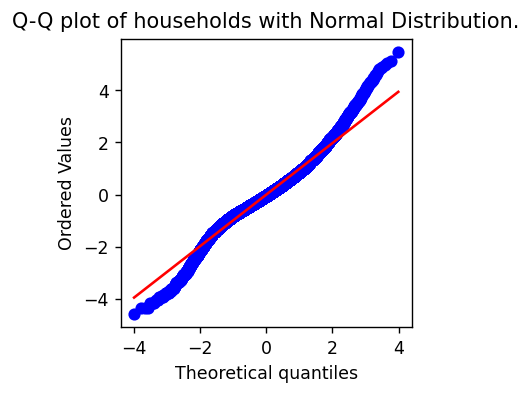

****************************************************************



In [76]:
P,F = box_cox_transform(DF = houses , columns= pld)